In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Categorical data analyser

def cat_var(df, cols):
    '''
    Return: a Pandas dataframe object with the following columns:
        - "categorical_variable" => every categorical variable include as an input parameter (string).
        - "number_of_possible_values" => the amount of unique values that can take a given categorical variable (integer).
        - "values" => a list with the posible unique values for every categorical variable (list).

    Input parameters:
        - df -> Pandas dataframe object: a dataframe with categorical variables.
        - cols -> list object: a list with the name (string) of every categorical variable to analyse.
    '''
    cat_list = []
    for col in cols:
        cat = df[col].unique()
        cat_num = len(cat)
        cat_dict = {"categorical_variable":col,
                    "number_of_possible_values":cat_num,
                    "values":cat}
        cat_list.append(cat_dict)
    df = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values", ascending=False)
    return df.reset_index(drop=True)

In [4]:
def ordinal_encoding(df):
    #df['cut'] = df['cut'].replace({'Fair': 1,
    #                               'Good': 2,
    #                               'Very Good': 3,
    #                               'Premium': 4,
    #                               'Ideal': 5})
    
    #df['color'] = df['color'].replace({'D': 1,
    #                                   'E': 2,
    #                                   'F': 3,
    #                                   'G': 4,
    #                                   'H': 5,
    #                                   'I': 6,
    #                                   'J': 7})
    
    #df['clarity'] = df['clarity'].replace({'VVS1': 1,
    #                                       'VVS2': 2,
    #                                       'VS1':  3,
    #                                       'VS2':  4,
    #                                       'SI1':  5,
    #                                       'SI2':  6,
    #                                       'I1':   7,
    #                                       'IF':   8})
    df['cut'] = df['cut'].replace({'Fair': 1,
                                   'Good': 2, 
                                   'Very Good': 3, 
                                   'Premium': 4, 
                                   'Ideal': 5})

    df['color'] = df['color'].replace({'D': 7,
                                       'E': 6,
                                       'F': 5,
                                       'G': 4,
                                       'H': 3,
                                       'I': 2,
                                       'J': 1})

    df['clarity'] = df['clarity'].replace({'I1': 1,
                                           'SI2': 2,
                                           'SI1': 3,
                                           'VS2': 4,
                                           'VS1': 5,
                                           'VVS2': 6,
                                           'VVS1': 7,
                                           'IF': 8})

    return df

In [5]:
def add_features(df):
    df['volume'] = df['x'] * df['y'] * df['z']
        
    return df

### Train dataset 

In [6]:
# load df train
diamonds_train = pd.read_csv('../data/diamonds_train.csv').rename(columns={'index_id': 'id'})
diamonds_train

,id,price,carat,city,cut,color,clarity,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,Kimberly,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25
1,248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...,4839,1.20,Kimberly,Premium,J,VS2,60.8,60.0,6.85,6.89,4.18
2,72b31cf00f8ab3967588fad4a32f61622cb162f9b7bc2c...,368,0.30,Kimberly,Premium,J,VS2,60.6,59.0,4.34,4.38,2.64
3,98c53df687f2e9b94da80eef5b9049f1fac456b4c41c80...,5053,1.20,Kimberly,Premium,J,VS2,62.6,57.0,6.80,6.72,4.23
4,5dfe43a321c6834c7de273c73aeadc705d919a5869e0f5...,3593,1.05,Kimberly,Premium,J,VS2,59.4,62.0,6.66,6.58,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,097db724e4c3e305e3cab516a90727b5ba198654479af6...,2632,0.59,Paris,Very Good,F,IF,59.9,63.0,5.44,5.47,3.27
40451,7a2f5310cf8293f60a9103040d9a0ac0a9ce1d625f5121...,9972,1.01,Paris,Very Good,F,IF,63.5,59.0,6.29,6.41,4.03
40452,7d6fb002a947a9c894eb5c2a5a12be30cb7d4af83a29d9...,886,0.30,Paris,Very Good,F,IF,62.4,56.0,4.28,4.31,2.68
40453,7880bd7fe5dcd28637eade8b95c42961c6c5acffa946a6...,3205,0.71,Antwerp,Fair,F,IF,58.7,62.0,5.87,5.81,3.43


In [7]:
diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  object 
 1   price    40455 non-null  int64  
 2   carat    40455 non-null  float64
 3   city     40455 non-null  object 
 4   cut      40455 non-null  object 
 5   color    40455 non-null  object 
 6   clarity  40455 non-null  object 
 7   depth    40455 non-null  float64
 8   table    40455 non-null  float64
 9   x        40455 non-null  float64
 10  y        40455 non-null  float64
 11  z        40455 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 3.7+ MB


In [8]:
col_diamonds = list(diamonds_train.columns)
cat_diamonds = cat_var(diamonds_train, col_diamonds)
cat_diamonds

,categorical_variable,number_of_possible_values,values
0,id,40455,[5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e9...
1,price,10378,"[4268, 4839, 368, 5053, 3593, 4974, 7553, 765,..."
2,x,543,"[6.83, 6.85, 4.34, 6.8, 6.66, 7.13, 7.36, 4.71..."
3,y,539,"[6.79, 6.89, 4.38, 6.72, 6.58, 7.08, 7.35, 4.6..."
4,z,363,"[4.25, 4.18, 2.64, 4.23, 3.93, 4.35, 4.43, 2.9..."
5,carat,270,"[1.21, 1.2, 0.3, 1.05, 1.35, 1.51, 0.4, 2.01, ..."
6,depth,175,"[62.4, 60.8, 60.6, 62.6, 59.4, 61.2, 60.2, 62...."
7,table,121,"[58.0, 60.0, 59.0, 57.0, 62.0, 61.0, 54.0, 56...."
8,city,13,"[Kimberly, Antwerp, London, New York City, Dub..."
9,clarity,8,"[VS2, SI1, I1, VS1, SI2, VVS2, VVS1, IF]"


In [9]:
diamonds_train.describe()

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


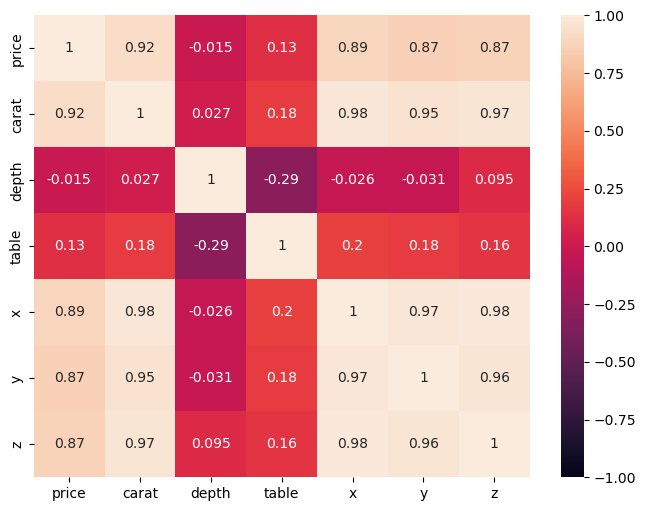

In [10]:
# correlation
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(diamonds_train.corr(), 
                 vmin=-1,
                 vmax=1,
                 annot=True)

In [11]:
diamonds_train_clean = diamonds_train.copy()

In [12]:
# ordinal
diamonds_train_clean = ordinal_encoding(diamonds_train_clean)
diamonds_train_clean.head(2)
# feature engineering
diamonds_train_clean = add_features(diamonds_train_clean)
diamonds_train_clean.head(2)

,id,price,carat,city,cut,color,clarity,depth,table,x,y,z,volume
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,Kimberly,4,1,4,62.4,58.0,6.83,6.79,4.25,197.096725
1,248aa2bdd0032920ac9e5f6ad36c350549da067efeaf7b...,4839,1.20,Kimberly,4,1,4,60.8,60.0,6.85,6.89,4.18,197.281370


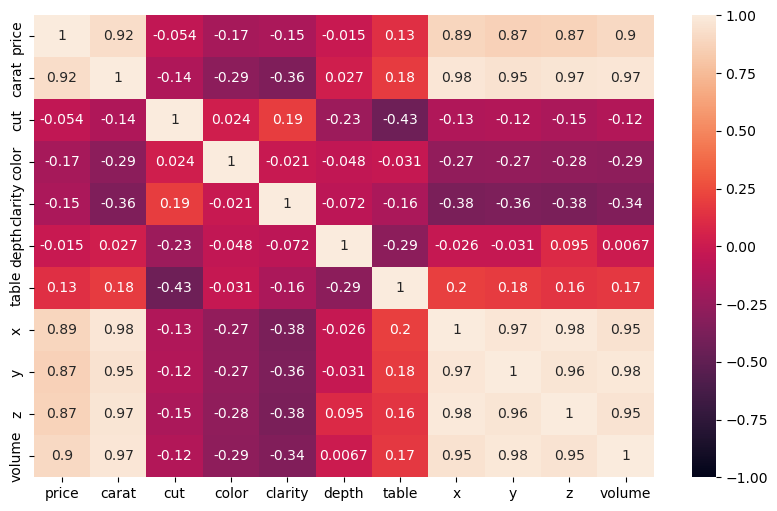

In [13]:
# correlation
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(diamonds_train_clean.corr(), 
                 vmin=-1,
                 vmax=1,
                 annot=True)

In [14]:
len(diamonds_train_clean.loc[(diamonds_train_clean['x'] == 0) | \
                             (diamonds_train_clean['y'] == 0) | \
                             (diamonds_train_clean['z'] == 0)])

16

### Test dataset

In [15]:
# load df test
diamonds_test = pd.read_csv('../data/diamonds_test.csv').rename(columns={'index_id': 'id'})
diamonds_test

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat


In [16]:
diamonds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
 10  city     13485 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [17]:
col_diamonds = list(diamonds_test.columns)
cat_diamonds = cat_var(diamonds_test, col_diamonds)
cat_diamonds

,categorical_variable,number_of_possible_values,values
0,id,13485,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,x,511,"[5.82, 6.81, 7.38, 6.09, 5.05, 6.38, 6.6, 6.1,..."
2,y,505,"[5.89, 6.89, 7.32, 6.13, 5.09, 6.34, 6.54, 6.1..."
3,z,329,"[3.67, 4.18, 4.57, 3.9, 3.19, 4.01, 3.87, 4.15..."
4,carat,234,"[0.79, 1.2, 1.57, 0.9, 0.5, 1.01, 1.04, 0.91, ..."
5,depth,146,"[62.7, 61.0, 62.2, 63.8, 62.9, 61.3, 63.1, 60...."
6,table,95,"[60.0, 57.0, 61.0, 54.0, 58.0, 55.0, 56.0, 59...."
7,city,13,"[Amsterdam, Surat, Kimberly, Paris, Tel Aviv, ..."
8,clarity,8,"[SI1, VS1, VS2, VVS1, SI2, VVS2, IF, I1]"
9,color,7,"[F, J, H, D, I, G, E]"


In [18]:
diamonds_test.describe()

,id,carat,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.798642,61.739095,57.490337,5.736454,5.739648,3.543474
std,3892.928525,0.469399,1.435310,2.237109,1.113671,1.128507,0.731005
min,0.000000,0.200000,50.800000,51.000000,0.000000,0.000000,0.000000
25%,3371.000000,0.400000,61.000000,56.000000,4.730000,4.730000,2.920000
50%,6742.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000
75%,10113.000000,1.040000,62.500000,59.000000,6.530000,6.530000,4.040000
max,13484.000000,5.010000,79.000000,73.000000,10.740000,31.800000,31.800000


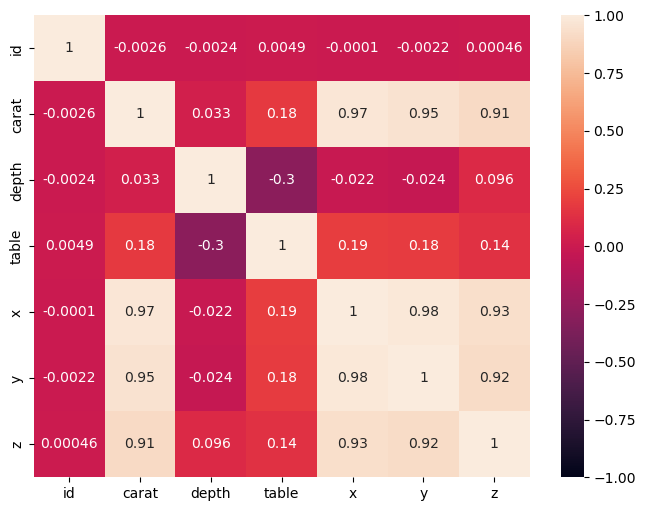

In [19]:
# correlation
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(diamonds_test.corr(), 
                 vmin=-1,
                 vmax=1,
                 annot=True)

In [20]:
diamonds_test_clean = diamonds_test.copy()

In [21]:
# ordinal
diamonds_test_clean = ordinal_encoding(diamonds_test_clean)
diamonds_test_clean.head(2)
# feature engineering
diamonds_test_clean = add_features(diamonds_test_clean)
diamonds_test_clean.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,city,volume
0,0,0.79,3,5,3,62.7,60.0,5.82,5.89,3.67,Amsterdam,125.806866
1,1,1.20,5,1,5,61.0,57.0,6.81,6.89,4.18,Surat,196.129362


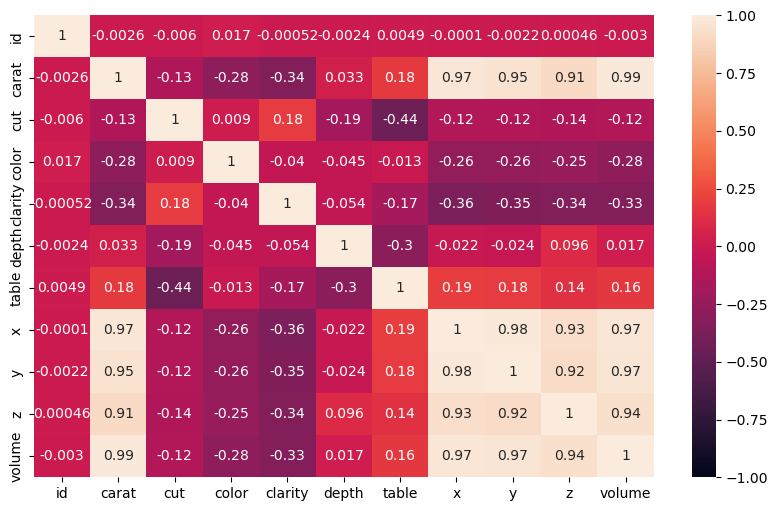

In [22]:
# correlation
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(diamonds_test_clean.corr(), 
                 vmin=-1,
                 vmax=1,
                 annot=True)

In [23]:
len(diamonds_test_clean.loc[(diamonds_test_clean['x'] == 0) | \
                            (diamonds_test_clean['y'] == 0) | \
                            (diamonds_test_clean['z'] == 0)])

4

### Price train vs price prediction

In [27]:
diamonds_train['price'].agg(['min', 'max', 'mean'])

min       326.000000
max     18823.000000
mean     3928.444469
Name: price, dtype: float64

In [28]:
df1 = pd.read_csv('../data/results/diamonds_results_HGBR_1.csv')
df1['price'].agg(['min', 'max', 'mean'])

min       285.472275
max     18942.860247
mean     3948.263594
Name: price, dtype: float64

In [29]:
df2 = pd.read_csv('../data/results/diamonds_results_HGBR_2.csv')
df2['price'].agg(['min', 'max', 'mean'])

min       344.524846
max     18449.916147
mean     3950.444710
Name: price, dtype: float64

In [30]:
diamonds_train['price'].describe()

count    40455.000000
mean      3928.444469
std       3992.416147
min        326.000000
25%        945.000000
50%       2397.000000
75%       5331.000000
max      18823.000000
Name: price, dtype: float64

In [31]:
df1['price'].describe()

count    13485.000000
mean      3948.263594
std       3967.499483
min        285.472275
25%        916.022684
50%       2459.274852
75%       5318.368727
max      18942.860247
Name: price, dtype: float64

In [32]:
df2['price'].describe()

count    13485.000000
mean      3950.444710
std       3965.272687
min        344.524846
25%        920.594252
50%       2446.508918
75%       5308.381146
max      18449.916147
Name: price, dtype: float64